<a href="https://colab.research.google.com/github/ahoucbvtw/LinearRegression-PyTroch/blob/main/PyTorch%20-%20LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 準備資料

torch.linspace(start, end, steps=100, out=None) 

參數：

start（float）-區間的起始點

end（float）-區間的終點

步驟（int）-在開始和結束間生成的樣本數

out（張量，可選的）-結果張量

## 生成0到10的4個數構成的等差數列

a = torch.linspace（0,10，steps = 4）

tensor([ 0.0000,  3.3333,  6.6667, 10.0000])

In [19]:
# 準備資料，這裡使用隨機產生的資料
# 使用.linspace建立 0-100 並且由100個數字構成的等差數列當作月份時間的X軸

from torch.autograd import Variable

x = Variable(torch.linspace(0, 100, steps = 100).type(torch.FloatTensor))
x

tensor([  0.0000,   1.0101,   2.0202,   3.0303,   4.0404,   5.0505,   6.0606,
          7.0707,   8.0808,   9.0909,  10.1010,  11.1111,  12.1212,  13.1313,
         14.1414,  15.1515,  16.1616,  17.1717,  18.1818,  19.1919,  20.2020,
         21.2121,  22.2222,  23.2323,  24.2424,  25.2525,  26.2626,  27.2727,
         28.2828,  29.2929,  30.3030,  31.3131,  32.3232,  33.3333,  34.3434,
         35.3535,  36.3636,  37.3737,  38.3838,  39.3939,  40.4040,  41.4141,
         42.4242,  43.4343,  44.4444,  45.4545,  46.4646,  47.4747,  48.4848,
         49.4949,  50.5051,  51.5152,  52.5253,  53.5354,  54.5455,  55.5556,
         56.5657,  57.5758,  58.5859,  59.5960,  60.6061,  61.6162,  62.6263,
         63.6364,  64.6465,  65.6566,  66.6667,  67.6768,  68.6869,  69.6970,
         70.7071,  71.7172,  72.7273,  73.7374,  74.7475,  75.7576,  76.7677,
         77.7778,  78.7879,  79.7980,  80.8081,  81.8182,  82.8283,  83.8384,
         84.8485,  85.8586,  86.8687,  87.8788,  88.8889,  89.89

標準正態分佈

torch.randn（* sizes，out = None）→張量

返回一個張量，包含從標準正態分佈（均值0，方差為1，即高斯白噪聲）中捕獲的單個隨機數。張量的形狀由參數sizes定義。

參數：

size（int ...）- 整體序列，定義了輸出張量的形狀，可以是多維矩陣也可單一數字(輸出則為一維矩陣)

out (Tensor, optinal) - 結果張量

例子：

torch.randn（2，3）

tensor([[-0.9392, -1.1346, -2.4477],
        [-1.2000,  0.6106,  1.4585]])

In [32]:
# 使用torch.randn()建立一個標準正態分布的亂數

rand = Variable(torch.randn(100)) * 7
rand

tensor([ -9.8772,   7.2215,   1.7469,  -7.4672,  -4.4234,   1.2331,  10.1761,
         -7.1933,   5.4306,   3.1915,  -6.4065,   2.6117,   4.2702,   4.6049,
         -2.6755,  -3.4436,   3.7823, -11.8767,  -2.1093,   1.2154,  -3.1325,
          1.1045,  -5.0601, -12.6191,   0.9956,  14.8270,   3.5763,   9.8192,
          3.0185,  -8.5497,   0.9875,   2.3484, -17.7715,  12.0179, -14.0032,
         -1.6474,  -3.1822,   5.8271,  -2.6049,   9.1652,   2.6852,  -0.1992,
         -5.1847,   7.9226,   4.8683,  13.8875,  -3.2233,  -7.8822,   0.3811,
          0.9067,  -4.4595,  -9.2646,  -4.0374, -11.8825,  -5.0584,   0.0356,
         -2.8684,   4.1864, -16.1661, -10.1733,   1.2786,   1.8911,   4.1601,
          4.0602,  -8.8885,  -2.8984,   9.1019,   5.4224, -10.2154,   1.4825,
         -1.7510, -12.8521,   5.1046,  -0.6740,  -1.9586,   5.8690,   1.5788,
         -1.6539,   2.0484,  -9.3338,   6.3465,  -2.5729,   1.1260,  -2.7632,
         -1.8118,   7.4226,   0.4082,  -4.5830, -12.2236,   4.54

In [33]:
# 而y部分(隨機亂數產生的房價)則假設為x月份的基礎上加上一隨機雜訊

y = x + rand
y

tensor([ -9.8772,   8.2316,   3.7671,  -4.4369,  -0.3830,   6.2836,  16.2367,
         -0.1226,  13.5114,  12.2825,   3.6945,  13.7228,  16.3914,  17.7363,
         11.4659,  11.7079,  19.9439,   5.2950,  16.0725,  20.4073,  17.0696,
         22.3166,  17.1621,  10.6132,  25.2380,  40.0796,  29.8389,  37.0919,
         31.3014,  20.7432,  31.2905,  33.6615,  14.5517,  45.3512,  20.3402,
         33.7061,  33.1814,  43.2008,  35.7789,  48.5591,  43.0892,  41.2149,
         37.2395,  51.3569,  49.3127,  59.3421,  43.2413,  39.5925,  48.8660,
         50.4016,  46.0456,  42.2506,  48.4878,  41.6529,  49.4870,  55.5912,
         53.6972,  61.7621,  42.4198,  49.4227,  61.8847,  63.5073,  66.7864,
         67.6966,  55.7580,  62.7582,  75.7685,  73.0992,  58.4715,  71.1794,
         68.9561,  58.8651,  77.8318,  73.0634,  72.7889,  81.6266,  78.3465,
         76.1239,  80.8363,  70.4642,  87.1546,  79.2453,  83.9542,  81.0752,
         83.0367,  93.2812,  87.2769,  83.2958,  76.6653,  94.44

In [40]:
# 進模型前資料預處理(將資料分train、test)
# 這裡train從0個月的資料取至倒數第12個月
# 這裡test則是取最後12個月的資料

x_train = x[:-12]
y_train = y[:-12]

x_test = x[-12:]
y_test = y[-12:]

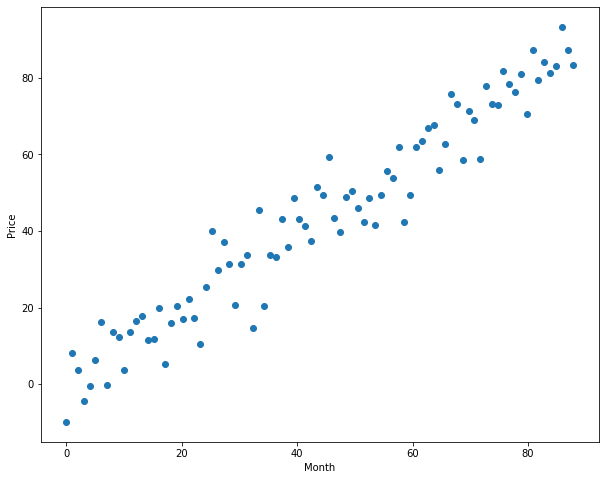

In [54]:
# 由於x, y都是Variable，因此需要使用.data獲取裡面的Tensor，而要畫圖則需要再轉換成Numpy格式

x_data = x_train.data.numpy()
y_data = y_train.data.numpy()

plt.figure(figsize = (10,8))

plt.plot(x_data, y_data, "o")
plt.xlabel("Month")
plt.ylabel("Price")
plt.show()

# 模型設計
**梯度下降法**

成本函數

H(X)= a*X + b 這條線到所有資料點在其「Y 方向」距離平方和

以線段H(X)來說的話： a = 斜率，b = 截距

![alt text](https://raw.githubusercontent.com/ahoucbvtw/Linear-Regression/main/Picture/Cost%20Function.png "Cost Function")


梯度下降演算法(成本函數之最小值)

對成本函數中的(a,b)分別做偏微分

也就是求H(X)= a*X + b中的斜率(a)和截距(b)的偏微分

![alt text](https://raw.githubusercontent.com/ahoucbvtw/Linear-Regression/main/Picture/Gradient%20Descent.png "Gradient Descent")

In [93]:
# 首先建立a, b的隨機自動微分變數

a = Variable(torch.rand(1), requires_grad = True)
b = Variable(torch.rand(1), requires_grad = True)

# 訓練重點

- 再計算yi時為了讓a、b與x張量的維度相同，因此使用.expand_as(x_train)

- 不能直接對一個自動微分變數進行數值更新，只能對其data屬性進行更新。也就是都是更新a.data內著東西

- PyTorch中如果函數後面加上 " _ " ，表示要用這個函數的計算結果更新目前的變數。
ex：a.data.add_(3) = 將a.data數值更新為 a.data + 3

In [94]:
# 於每一步運算中需先計算yi，也就是預測的yi方程式所有點，再計算Cost Function(也就是j)
# 接著利用backward()對j所有計算圖中的葉節點(a,b)求導。
# 而導數資訊都儲存再a.grad、b.grad中
# 所以透過a.data.add_(-lr * a.grad.data)、b.data.add_(-lr * b.grad.data)進行a, b的更新
# 於更新完後要將他們的梯度資訊清空a.grad.data.zero_()

lr = 0.0001
epoch = 50000

for i in range(epoch):
    yi = a.expand_as(x_train) * x_train + b.expand_as(x_train)
    j = torch.mean((yi - y_train) ** 2) / 2


    j.backward() # 對成本函數做偏導數(梯度反轉)

    a.data.add_(-lr * a.grad.data) # 利用上一步計算獲得的a的梯度資訊更新於a的a.data數值
    b.data.add_(-lr * b.grad.data) # 利用上一步計算獲得的b的梯度資訊更新於b的b.data數值

    # 清空儲存在變數a, b中的梯度資訊，避免再求導過程中反覆累加
    a.grad.data.zero_() # 清空a的梯度資訊
    b.grad.data.zero_() # 清空b的梯度資訊

print("Cost Function：", j)

Cost Function： tensor(22.3202, grad_fn=<DivBackward0>)


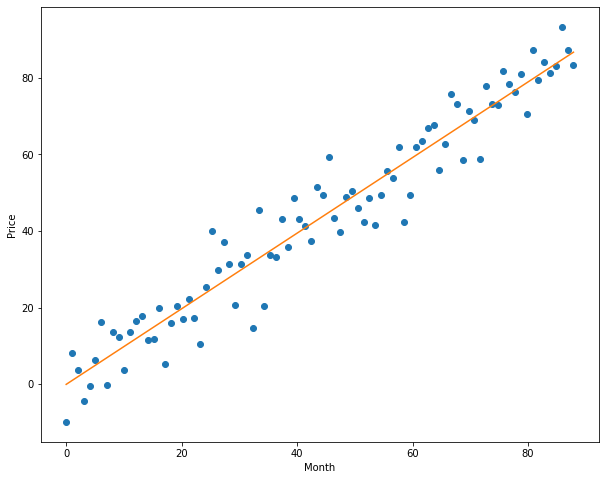

In [95]:
prediction_y = a.data.numpy() * x_data + b.data.numpy() # 迴歸線的y值

plt.figure(figsize = (10,8))
plt.plot(x_data, y_data, "o") # 原本train data房價的資料
plt.plot(x_data, prediction_y) # 使用梯度下降法求得的最符合train data之間房價資料的迴歸線

plt.xlabel("Month")
plt.ylabel("Price")
plt.show()

# 驗證

利用test data驗證此迴歸線是否準確

In [96]:
testdata_prediction = a.expand_as(x_test) * x_test + b.expand_as(x_test)
testdata_prediction

tensor([87.6227, 88.6190, 89.6152, 90.6115, 91.6077, 92.6040, 93.6003, 94.5965,
        95.5928, 96.5891, 97.5853, 98.5816], grad_fn=<AddBackward0>)

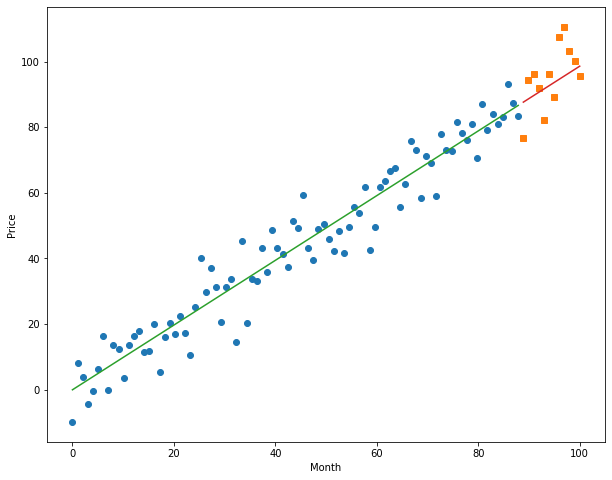

In [100]:
x_pred = x_test.data.numpy() # test data部分的X軸值
y_pred = y_test.data.numpy() # test data部分的Y軸值
predict_y = a.data.numpy() * x_pred + b.data.numpy() # test data部分的迴歸線預測Y值 = testdata_prediction

# np.r_[a,b,c...]可以拼接多個數組，要求待拼接的多個數組的列數必須相同
fullx_data = np.r_[x_data, x_pred] # 將原本x_train的x軸部分與x_test的x軸部分做合併(也就是將x_train與x_test的資料做合併)

plt.figure(figsize = (10,8))
plt.plot(x_data, y_data, "o") # 原本train data房價的資料
plt.plot(x_pred, y_pred, "s") # 原本test data房價的資料

plt.plot(x_data, prediction_y) # 使用梯度下降法求得的最符合train data之間房價資料的迴歸線
plt.plot(x_pred, predict_y) # 使用梯度下降法求得的最符合test data之間房價資料的迴歸線

plt.xlabel("Month")
plt.ylabel("Price")
plt.show()